# Определение выгодного тарифа для телеком компании

Мы аналитики компании «Мегалайн» — федерального оператора сотовой связи. Клиентам компании предлагают два тарифных плана: «Смарт» и «Ультра». 


**Цель исследования**:

Установить какой тариф приносит больше денег компании. Эта информация необходима коммерческому департаменту для корретировки рекламного бюджета

**Ход исследования**:

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Мы проанализируем поведение клиентов и сделаем вывод — какой тариф лучше.

Описание тарифов:

1) Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля
    сообщение: 3 рубля
    
    1 Гб интернет-трафика: 200 рублей
    
2) Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей
    
Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Данные мы получим из файлов `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv`, `users.csv.` . О качестве данных ничего не известно. Поэтому понадобится обзор данных. 

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Прочитаем-файл-users.csv" data-toc-modified-id="Прочитаем-файл-users.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Прочитаем файл users.csv</a></span></li><li><span><a href="#Прочитаем-файл-calls.csv" data-toc-modified-id="Прочитаем-файл-calls.csv-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Прочитаем файл calls.csv</a></span></li><li><span><a href="#Прочитаем-файл-internet.csv" data-toc-modified-id="Прочитаем-файл-internet.csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Прочитаем файл internet.csv</a></span></li><li><span><a href="#Прочитаем-файл-messages.csv" data-toc-modified-id="Прочитаем-файл-messages.csv-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Прочитаем файл messages.csv</a></span></li><li><span><a href="#Прочитаем-файл-tariffs.csv" data-toc-modified-id="Прочитаем-файл-tariffs.csv-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Прочитаем файл tariffs.csv</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-нализ-данных" data-toc-modified-id="Исследовательский-нализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский нализ данных</a></span><ul class="toc-item"><li><span><a href="#Сколько-минут-разговора,-сколько-сообщений-и-какой-объём-интернет-трафика-требуется-пользователям-каждого-тарифа-в-месяц?" data-toc-modified-id="Сколько-минут-разговора,-сколько-сообщений-и-какой-объём-интернет-трафика-требуется-пользователям-каждого-тарифа-в-месяц?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?</a></span></li><li><span><a href="#Количество-отправленных-сообщений" data-toc-modified-id="Количество-отправленных-сообщений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество отправленных сообщений</a></span></li><li><span><a href="#Длительность-звонков" data-toc-modified-id="Длительность-звонков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Длительность звонков</a></span></li><li><span><a href="#Интернет-траффик" data-toc-modified-id="Интернет-траффик-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Интернет траффик</a></span></li><li><span><a href="#Выручка" data-toc-modified-id="Выручка-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выручка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенстве-средних-двух-генеральных-совокупностей-№1" data-toc-modified-id="Гипотеза-о-равенстве-средних-двух-генеральных-совокупностей-№1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза о равенстве средних двух генеральных совокупностей №1</a></span></li><li><span><a href="#Гипотеза-о-равенстве-средних-двух-генеральных-совокупностей-№2" data-toc-modified-id="Гипотеза-о-равенстве-средних-двух-генеральных-совокупностей-№2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза о равенстве средних двух генеральных совокупностей №2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файлов

Импортируем библиотеки:

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from scipy import stats as st

In [2]:
warnings.filterwarnings('ignore')

Настроим вывод для вещественных чисел:

In [3]:
pd.options.display.float_format = '{:.2f}'.format

### Прочитаем файл users.csv
из папки `datasets` и сохраним его в переменной `df_users`:

In [4]:
df_users = pd.read_csv('datasets/users.csv')
display(df_users)
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Итак, в таблице 8 колонок, 500 строк. Тип данных в столбцах: `object`, `int64`.

Описание данных. Таблица `users` (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент - выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

Для подсчета количества и процента пропущенных значений создадим функцию `df_statistic`

In [5]:
def df_statistic(df):
    df_stat = pd.concat([df.isna().sum(), df.isna().mean().map('{:.2%}'.format)], axis=1)
    df_stat.columns = ['количество пропущенных значений', 'процент пропущенных значений']
    return df_stat

Напишем функцию investigate_column для анализа данных в колонке таблицы

In [6]:
def investigate_column(df, column, is_category=False):
    '''
    аргументы функции:
    df - имя таблицы
    column - имя колонки датафрейма
    is_category - True для категориального признака. По умолчанию False
    is_bool - True для булевого признака. По умолчанию False
    '''
    display(df_statistic(df).query('index == @column'))
    if not is_category:
        print('')
        print('Метод describe:')
        print(df[column].describe())
    else:
        print('')
        print('Метод value_counts:')
        print(df[column].value_counts())

Для каждой колонки таблицы `df_users` вызовем функцию `investigate_column`

In [7]:
for column in df_users.columns:
    investigate_column(df_users, column)

,количество пропущенных значений,процент пропущенных значений
user_id,0,0.00%



Метод describe:
count    500.00
mean    1249.50
std      144.48
min     1000.00
25%     1124.75
50%     1249.50
75%     1374.25
max     1499.00
Name: user_id, dtype: float64


,количество пропущенных значений,процент пропущенных значений
age,0,0.00%



Метод describe:
count   500.00
mean     46.59
std      16.67
min      18.00
25%      32.00
50%      46.00
75%      62.00
max      75.00
Name: age, dtype: float64


,количество пропущенных значений,процент пропущенных значений
churn_date,462,92.40%



Метод describe:
count             38
unique            33
top       2018-12-03
freq               2
Name: churn_date, dtype: object


,количество пропущенных значений,процент пропущенных значений
city,0,0.00%



Метод describe:
count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object


,количество пропущенных значений,процент пропущенных значений
first_name,0,0.00%



Метод describe:
count       500
unique      246
top       Радим
freq          6
Name: first_name, dtype: object


,количество пропущенных значений,процент пропущенных значений
last_name,0,0.00%



Метод describe:
count           500
unique          419
top       Андреенко
freq              5
Name: last_name, dtype: object


,количество пропущенных значений,процент пропущенных значений
reg_date,0,0.00%



Метод describe:
count            500
unique           270
top       2018-05-28
freq               8
Name: reg_date, dtype: object


,количество пропущенных значений,процент пропущенных значений
tariff,0,0.00%



Метод describe:
count       500
unique        2
top       smart
freq        351
Name: tariff, dtype: object


In [8]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

**Вывод по колонке `user_id` таблицы `df_users`:**

Видим, что в колонке нет пропущенных значений. Проблем с данными нет: значения меняются от 1000 до 1499

**Выводы по колонке `age` таблицы `df_users`:**

Видим, что в колонке нет пропущенных значений. Проблем с данными нет: значения меняются от 18 лет до 75 лет

**Выводы по колонка `churn_date` таблицы `df_users`:**

Видим, что в колонке есть пропущенные значения. Но данные из этой колонки нам не пригодятся для ответа на поставленные вопросы, поэтому на этапе предобработки не будем заполнять эти пропуски, оставим без изменения

**Выводы по колонке `reg_date` таблицы `df_users`:**

Видим, что в колонке нет пропущенных значений.

**Вывод по колонкам `city`, `first_name`,`last_name`, `tariff` таблицы `df_users`:**

Видим, что в колонках нет пропущенных значений. Проблем с данными в колонках нет. В таблицe присутстуют данные о 500 пользователях

### Прочитаем файл calls.csv
из папки `datasets` и сохраним его в переменной `df_calls`:

In [9]:
df_calls = pd.read_csv('datasets/calls.csv')

Выведем на экран первые и последние 5 строк таблицы `df_calls`:

In [10]:
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Получим общую информацию о таблице:

In [11]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице 4 колонки, 202607 строк. Тип данных в столбцах: `object`, `float64`, `int64`.

Описание данных. Таблица `calls` (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Для каждой колонки таблицы `df_calls` вызовем функцию `investigate_column`

In [12]:
for column in df_calls.columns:
    investigate_column(df_calls, column)

,количество пропущенных значений,процент пропущенных значений
id,0,0.00%



Метод describe:
count       202607
unique      202607
top       1195_124
freq             1
Name: id, dtype: object


,количество пропущенных значений,процент пропущенных значений
call_date,0,0.00%



Метод describe:
count         202607
unique           365
top       2018-12-31
freq            1435
Name: call_date, dtype: object


,количество пропущенных значений,процент пропущенных значений
duration,0,0.00%



Метод describe:
count   202607.00
mean         6.76
std          5.84
min          0.00
25%          1.30
50%          6.00
75%         10.70
max         38.00
Name: duration, dtype: float64


,количество пропущенных значений,процент пропущенных значений
user_id,0,0.00%



Метод describe:
count   202607.00
mean      1253.94
std        144.72
min       1000.00
25%       1126.00
50%       1260.00
75%       1379.00
max       1499.00
Name: user_id, dtype: float64


Определим `user_id` пользователей, данных о которых в таблице `df_calls`

In [13]:
users = df_calls['user_id'].unique().tolist()

In [14]:
df_users.query('user_id not in @users')['user_id'].tolist()

[1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489]

**Выводы по колонке `id` таблицы `df_calls`:**

Видим, что в колонке нет пропущенных значений.
Все значения в колонке - уникальные, значит в таблице явные дубликаты отсутствуют.
На этапе предобработки необходимо преобразовать тип колонки в int

**Выводы по колонке `call_date` таблицы `df_calls`:**

Видим, что в колонке нет пропущенных значений.
На этапе предобработки необходимо преобразовать тип колонки в datetime

**Выводы по колонке `duration` таблицы `df_calls`:**

Видим, что в колонке нет пропущенных значений. Проблем с данными нет: значения меняются от 0 минут до 38 минут. Длительность звонка в 0 минут - это не ошибка, нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

**Вывод по колонке `user_id` таблицы `df_calls`:**

Видим, что в колонке нет пропущенных значений. Проблем с данными нет: значения меняются от 1000 до 1499. Данные в таблице присутствуют для 492 пользователей

### Прочитаем файл internet.csv
из папки `datasets` и сохраним его в переменной `df_internet`:

In [15]:
df_internet = pd.read_csv('datasets/internet.csv', index_col=0)
display(df_internet)
df_internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Итак, в таблице 4 колонки, 149395 строк. Тип данных в столбцах: `object`, `float64`, `int64`.

Описание данных. Таблица `internet` (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Для каждой колонки таблицы `df_internet` вызовем функцию `investigate_column`

In [16]:
for column in df_internet.columns:
    investigate_column(df_internet, column)

,количество пропущенных значений,процент пропущенных значений
id,0,0.00%



Метод describe:
count      149396
unique     149396
top       1039_45
freq            1
Name: id, dtype: object


,количество пропущенных значений,процент пропущенных значений
mb_used,0,0.00%



Метод describe:
count   149396.00
mean       370.19
std        278.30
min          0.00
25%        138.19
50%        348.01
75%        559.55
max       1724.83
Name: mb_used, dtype: float64


,количество пропущенных значений,процент пропущенных значений
session_date,0,0.00%



Метод describe:
count         149396
unique           365
top       2018-12-31
freq            1057
Name: session_date, dtype: object


,количество пропущенных значений,процент пропущенных значений
user_id,0,0.00%



Метод describe:
count   149396.00
mean      1252.10
std        144.05
min       1000.00
25%       1130.00
50%       1251.00
75%       1380.00
max       1499.00
Name: user_id, dtype: float64


Определим `user_id` пользователей, данных о которых в таблице `df_internet`

In [17]:
users = df_internet['user_id'].unique().tolist()

In [18]:
df_users.query('user_id not in @users')['user_id'].tolist()

[1128, 1273, 1371]

**Выводы по колонке `id` таблицы `df_internet`:**

Видим, что в колонке нет пропущенных значений.
Все значения в колонке - уникальные, значит в таблице явные дубликаты отсутствуют.
На этапе предобработки необходимо преобразовать тип колонки в int

**Выводы по колонке `session_date` таблицы `df_internet`:**

Видим, что в колонке нет пропущенных значений.
На этапе предобработки необходимо преобразовать тип колонки в datetime

**Выводы по колонке `mb_used` таблицы `df_internet`:**

Видим, что в колонке нет пропущенных значений. Проблем с данными нет: значения меняются от 0 мб до 1724 Мб. Объем потраченного интернета в 0 Мб - это не ошибка, нулями обозначены сессии, когда пользователь не тратил интернет или была ошибка с подключением, поэтому их не нужно удалять.

**Вывод по колонке `user_id` таблицы `df_internet`:**

Видим, что в колонке нет пропущенных значений. Проблем с данными нет: значения меняются от 1000 до 1499. Данные в таблице присутствуют для 497 пользователей

### Прочитаем файл messages.csv
из папки `datasets` и сохраним его в переменной `df_messages`:

In [19]:
df_messages = pd.read_csv('datasets/messages.csv')
display(df_messages)
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Итак, в таблице 3 колонки, 123036 строк. Тип данных в столбцах: `object`, `int64`.

Описание данных. Таблица `messages` (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Для каждой колонки таблицы `df_messages` вызовем функцию `investigate_column`

In [20]:
for column in df_messages.columns:
    investigate_column(df_messages, column)

,количество пропущенных значений,процент пропущенных значений
id,0,0.00%



Метод describe:
count     123036
unique    123036
top       1056_1
freq           1
Name: id, dtype: object


,количество пропущенных значений,процент пропущенных значений
message_date,0,0.00%



Метод describe:
count         123036
unique           364
top       2018-12-31
freq             859
Name: message_date, dtype: object


,количество пропущенных значений,процент пропущенных значений
user_id,0,0.00%



Метод describe:
count   123036.00
mean      1256.99
std        143.52
min       1000.00
25%       1134.00
50%       1271.00
75%       1381.00
max       1499.00
Name: user_id, dtype: float64


Определим `user_id` пользователей, данных о которых в таблице `df_messages`

In [21]:
users = df_messages['user_id'].unique().tolist()

In [22]:
len(df_users.query('user_id not in @users')['user_id'])

74

**Выводы по колонке `id` таблицы `df_messages`:**

Видим, что в колонке нет пропущенных значений.
Все значения в колонке - уникальные, значит в таблице явные дубликаты отсутствуют.
На этапе предобработки необходимо преобразовать тип колонки в int

**Выводы по колонке `message_date` таблицы `df_messages`:**

Видим, что в колонке нет пропущенных значений.
На этапе предобработки необходимо преобразовать тип колонки в datetime


**Вывод по колонке `user_id` таблицы `df_messages`:**

Видим, что в колонке нет пропущенных значений. Проблем с данными нет: значения меняются от 1000 до 1499. Данные в таблице присутствуют для 426 пользователей

### Прочитаем файл tariffs.csv
из папки `datasets` и сохраним его в переменной `df_tariffs`:

In [23]:
df_tariffs = pd.read_csv('datasets/tariffs.csv')
display(df_tariffs)
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Итак, в таблице 8 колонок, 2 строки: 2 тарифа. Тип данных в столбцах: `object`, `int64`.

Описание данных. Таблица `tariffs` (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Выводы по таблицe `df_tariffs`:**

Проблем с данными в таблице нет

### Вывод

Изучили столбцы в датасетах, необходимые для формирования ответов на поставленные вопросы. Были определены необходимые действия для этапа предобработки данных.

В таблице `internet` был найден некорректный столбец `Unnamed: 0` - избавились от него

## Предобработка данных

Преобразуем типы колонок в `int`

In [24]:
dfs = [df_calls, df_internet, df_messages]
for df in dfs:
    df['id'] = df['id'].astype('int')

Преобразуем тип колонок `call_date`, `session_date`, `message_date` в `datetime`

In [25]:
dfs = [df_calls, df_internet, df_messages, df_users]
columns = ['call_date', 'session_date', 'message_date']

In [26]:
for df, column in zip(dfs, columns):
    df[column] = pd.to_datetime(df[column], format = '%Y-%m-%d')
    print(df[column].describe(datetime_is_numeric=True))
    print('_ '*20)

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
count                           123036
mean     2018-09-04 15:28:42.227640576
min                2018-01-02 00:00:00
25%                2018-07-09 00:00:00
50%                2018-09-20 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: message_date, dtype: object


Округлим значение в колонках до большего целого, согласно условиям тарифов

In [27]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

In [28]:
df_calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0.00,1000
1,10001,2018-08-17,0.00,1000
2,10002,2018-06-11,3.00,1000
3,10003,2018-09-21,14.00,1000
4,10004,2018-12-15,6.00,1000


## Расчёты и добавление результатов в таблицу

**Посчитаем для каждого пользователя:**
- количество сделанных звонков и израсходованных минут разговора по месяцам:

In [29]:
calls_groupby = (
    df_calls
    .groupby(['user_id', pd.Grouper(key='call_date', freq='MS')])
    .agg(Кол_во_звонков = ('id', 'count'), Кол_во_минут = ('duration', 'sum'))
)
calls_groupby.index.names = (['user_id', 'month'])
display(calls_groupby)

Кол_во_звонков  Кол_во_минут
user_id month                                   
1000    2018-05-01              22        159.00
        2018-06-01              43        172.00
        2018-07-01              47        340.00
        2018-08-01              52        408.00
        2018-09-01              58        466.00
...                            ...           ...
1498    2018-10-01              41        247.00
1499    2018-09-01               9         70.00
        2018-10-01              68        449.00
        2018-11-01              74        612.00
        2018-12-01              69        492.00

[3174 rows x 2 columns]

**Посчитаем для каждого пользователя:**
- количество отправленных сообщений по месяцам:

In [30]:
messages_groupby = (
    df_messages
    .groupby(['user_id', pd.Grouper(key='message_date', freq='MS')])
    .agg(Кол_во_сообщений = ('id', 'count'))
)
messages_groupby.index.names = (['user_id', 'month'])
display(messages_groupby)

Кол_во_сообщений
user_id month                       
1000    2018-05-01                22
        2018-06-01                60
        2018-07-01                75
        2018-08-01                81
        2018-09-01                57
...                              ...
1498    2018-10-01                42
1499    2018-09-01                11
        2018-10-01                48
        2018-11-01                59
        2018-12-01                66

[2717 rows x 1 columns]

**Посчитаем для каждого пользователя:**
- объем израсходованного интернет-трафика по месяцам:

In [31]:
internet_groupby = (
    df_internet
    .groupby(['user_id', pd.Grouper(key='session_date', freq='MS')])
    .agg(Интернет_Мб = ('mb_used', 'sum'))
)
internet_groupby.index.names = (['user_id', 'month'])

Добавим колонку с интернет трафиком в Гб

In [32]:
internet_groupby['Интернет_Гб'] = internet_groupby['Интернет_Мб']/1024

In [33]:
internet_groupby.head(5)

Интернет_Мб  Интернет_Гб
user_id month                               
1000    2018-05-01      2253.49         2.20
        2018-06-01     23233.77        22.69
        2018-07-01     14003.64        13.68
        2018-08-01     14055.93        13.73
        2018-09-01     14568.91        14.23

**Посчитаем для каждого пользователя:**
- помесячную выручку с каждого пользователя по звонкам

Но для начала добавим в таблицу `calls_groupby` название тарифа для каждого пользователя, объединив таблицы `calls_groupby` и `df_users` по колонке `user_id`

In [34]:
calls_groupby = calls_groupby.reset_index().merge(df_users[['user_id', 'tariff']], how='left', on='user_id')
calls_groupby.head(5)

,user_id,month,Кол_во_звонков,Кол_во_минут,tariff
0,1000,2018-05-01,22,159.00,ultra
1,1000,2018-06-01,43,172.00,ultra
2,1000,2018-07-01,47,340.00,ultra
3,1000,2018-08-01,52,408.00,ultra
4,1000,2018-09-01,58,466.00,ultra


Далее добавим в таблицу `calls_groupby` количество минут согласно выбранного тарифа, стоимость минуты сверх тарифа, объединив таблицы `calls_groupby` и `df_tariffs` по колонке с названием тарифа

In [35]:
calls_groupby = (
    pd
    .merge(calls_groupby, df_tariffs[['tariff_name', 'minutes_included', 'rub_per_minute']], \
           how='left', left_on='tariff', right_on='tariff_name')
)

И наконец, посчитаем выручку с каждого пользователя по звонкам: вычтем бесплатный лимит из суммарного количества звонков, а остаток умножем на значение из тарифного плана.

In [36]:
def calls_revenue_def(row):
    if row['Кол_во_минут'] > row['minutes_included']:
        return ((row['Кол_во_минут'] - row['minutes_included'])*row['rub_per_minute'])
    else:
        return 0

In [37]:
calls_groupby['calls_revenue'] = calls_groupby.apply(calls_revenue_def, axis=1)

In [38]:
calls_groupby.query('calls_revenue > 0').head()

,user_id,month,Кол_во_звонков,Кол_во_минут,tariff,tariff_name,minutes_included,rub_per_minute,calls_revenue
32,1005,2018-03-01,77,606.00,smart,smart,500,3,318.00
33,1005,2018-04-01,101,712.00,smart,smart,500,3,636.00
34,1005,2018-05-01,73,595.00,smart,smart,500,3,285.00
35,1005,2018-06-01,80,612.00,smart,smart,500,3,336.00
36,1005,2018-07-01,77,569.00,smart,smart,500,3,207.00


In [39]:
len(calls_groupby.query('calls_revenue > 0 and tariff == "ultra"'))

0

Видим, что превышение лимита по минутам в тарифе `ultra` нет ни у одного пользователя

**Посчитаем для каждого пользователя:**
- помесячную выручку с каждого пользователя по сообщениям

Добавим в таблицу `messages_groupby` название тарифа для каждого пользователя, объединив таблицы `messages_groupby` и `df_users` по колонке `user_id`

In [40]:
messages_groupby = messages_groupby.reset_index().merge(df_users[['user_id', 'tariff']], how='left', on='user_id')
messages_groupby.head(5)

,user_id,month,Кол_во_сообщений,tariff
0,1000,2018-05-01,22,ultra
1,1000,2018-06-01,60,ultra
2,1000,2018-07-01,75,ultra
3,1000,2018-08-01,81,ultra
4,1000,2018-09-01,57,ultra


Далее добавим в таблицу `messages_groupby` количество смс согласно выбранного тарифа, стоимость смс сверх тарифа, объединив таблицы `messages_groupby` и `df_tariffs` по колонке с названием тарифа

In [41]:
messages_groupby = (
    pd
    .merge(messages_groupby, df_tariffs[['tariff_name', 'messages_included', 'rub_per_message']], \
           how='left', left_on='tariff', right_on='tariff_name')
)

И наконец, посчитаем выручку с каждого пользователя по смс: вычтем бесплатный лимит из суммарного количества смс, а остаток умножем на значение из тарифного плана.

In [42]:
def messages_revenue_def(row):
    if row['Кол_во_сообщений'] > row['messages_included']:
        return ((row['Кол_во_сообщений'] - row['messages_included'])*row['rub_per_message'])
    else:
        return 0

In [43]:
messages_groupby['messages_revenue'] = messages_groupby.apply(messages_revenue_def, axis=1)

In [44]:
messages_groupby.query('messages_revenue > 0').head()

,user_id,month,Кол_во_сообщений,tariff,tariff_name,messages_included,rub_per_message,messages_revenue
30,1005,2018-03-01,56,smart,smart,50,3,18
34,1005,2018-07-01,56,smart,smart,50,3,18
35,1005,2018-08-01,64,smart,smart,50,3,42
36,1005,2018-09-01,52,smart,smart,50,3,6
38,1005,2018-11-01,51,smart,smart,50,3,3


In [45]:
len(messages_groupby.query('messages_revenue > 0 and tariff == "ultra"'))

0

Видим, что превышение лимита по минутам в тарифе `ultra` нет ни у одного пользователя

**Посчитаем для каждого пользователя:**
- помесячную выручку с каждого пользователя по интернету

Добавим в таблицу `internet_groupby` название тарифа для каждого пользователя, объединив таблицы `internet_groupby` и `df_users` по колонке `user_id`

In [46]:
internet_groupby = internet_groupby.reset_index().merge(df_users[['user_id', 'tariff']], how='left', on='user_id')
internet_groupby.head(5)

,user_id,month,Интернет_Мб,Интернет_Гб,tariff
0,1000,2018-05-01,2253.49,2.20,ultra
1,1000,2018-06-01,23233.77,22.69,ultra
2,1000,2018-07-01,14003.64,13.68,ultra
3,1000,2018-08-01,14055.93,13.73,ultra
4,1000,2018-09-01,14568.91,14.23,ultra


Далее добавим в таблицу `internet_groupby` количество Гб интернета согласно выбранного тарифа, стоимость Гб интернета сверх тарифа, объединив таблицы `internet_groupby` и `df_tariffs` по колонке с названием тарифа

In [47]:
internet_groupby = (
    pd
    .merge(internet_groupby, df_tariffs[['tariff_name', 'mb_per_month_included', 'rub_per_gb']], \
           how='left', left_on='tariff', right_on='tariff_name')
)

И наконец, посчитаем выручку с каждого пользователя по интернету: вычтем бесплатный лимит из суммарного количества потраченного интернета, а остаток умножем на значение из тарифного плана.

In [48]:
def internet_revenue_def(row):
    if row['Интернет_Мб'] > row['mb_per_month_included']:
        return row['rub_per_gb']*np.ceil((row['Интернет_Мб'] - row['mb_per_month_included'])/1024)
    else:
        return 0

In [49]:
internet_groupby['internet_revenue'] = internet_groupby.apply(internet_revenue_def, axis=1)

In [50]:
internet_groupby.query('internet_revenue > 0').head()

,user_id,month,Интернет_Мб,Интернет_Гб,tariff,tariff_name,mb_per_month_included,rub_per_gb,internet_revenue
8,1001,2018-11-01,18429.34,18.00,smart,smart,15360,200,600.00
11,1002,2018-07-01,17580.10,17.17,smart,smart,15360,200,600.00
12,1002,2018-08-01,20319.26,19.84,smart,smart,15360,200,1000.00
13,1002,2018-09-01,16691.08,16.30,smart,smart,15360,200,400.00
15,1002,2018-11-01,18587.28,18.15,smart,smart,15360,200,800.00


In [51]:
len(internet_groupby.query('internet_revenue > 0 and tariff == "ultra"'))

134

Видим, что превышение лимита по трафику интернета в тарифах `smart` и `ultra` есть

Объединим таблицы в датафрейм `revenue_stat`:

In [52]:
revenue_stat = (
    calls_groupby[['user_id', 'month', 'Кол_во_минут', 'calls_revenue']]
    .merge(internet_groupby[['user_id', 'month', 'Интернет_Гб', 'internet_revenue']],\
           how='outer', on=['user_id', 'month'])
    .merge(messages_groupby[['user_id', 'month', 'Кол_во_сообщений', 'messages_revenue']],\
           how='outer', on=['user_id', 'month'])
    .merge(df_users[['user_id', 'tariff', 'city']], on='user_id')
    .merge(df_tariffs[['tariff_name', 'rub_monthly_fee']], left_on='tariff', right_on='tariff_name')
    .sort_values(by=['user_id', 'month'])
)

In [53]:
revenue_stat.head(10).T

,0,1,2,3,4,5,6,7,985,986
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1001,1001
month,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
Кол_во_минут,159.00,172.00,340.00,408.00,466.00,350.00,338.00,333.00,430.00,414.00
calls_revenue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Интернет_Гб,2.20,22.69,13.68,13.73,14.23,14.36,14.41,9.59,18.00,13.71
internet_revenue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,0.00
Кол_во_сообщений,22.00,60.00,75.00,81.00,57.00,73.00,58.00,70.00,NaN,NaN
messages_revenue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
tariff,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,smart,smart
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва


In [54]:
revenue_stat.head(10)

,user_id,month,Кол_во_минут,calls_revenue,Интернет_Гб,internet_revenue,Кол_во_сообщений,messages_revenue,tariff,city,tariff_name,rub_monthly_fee
0,1000,2018-05-01,159.00,0.00,2.20,0.00,22.00,0.00,ultra,Краснодар,ultra,1950
1,1000,2018-06-01,172.00,0.00,22.69,0.00,60.00,0.00,ultra,Краснодар,ultra,1950
2,1000,2018-07-01,340.00,0.00,13.68,0.00,75.00,0.00,ultra,Краснодар,ultra,1950
3,1000,2018-08-01,408.00,0.00,13.73,0.00,81.00,0.00,ultra,Краснодар,ultra,1950
4,1000,2018-09-01,466.00,0.00,14.23,0.00,57.00,0.00,ultra,Краснодар,ultra,1950
5,1000,2018-10-01,350.00,0.00,14.36,0.00,73.00,0.00,ultra,Краснодар,ultra,1950
6,1000,2018-11-01,338.00,0.00,14.41,0.00,58.00,0.00,ultra,Краснодар,ultra,1950
7,1000,2018-12-01,333.00,0.00,9.59,0.00,70.00,0.00,ultra,Краснодар,ultra,1950
985,1001,2018-11-01,430.00,0.00,18.00,600.00,NaN,NaN,smart,Москва,smart,550
986,1001,2018-12-01,414.00,0.00,13.71,0.00,NaN,NaN,smart,Москва,smart,550


Определим `user_id` пользователей, данных о которых в таблице `revenue_stat`

In [55]:
users = revenue_stat['user_id'].unique().tolist()

In [56]:
df_users.query('user_id not in @users')['user_id'].tolist()

[1128, 1371]

Для пользователей 1128 и 1371 нет данных ни по звонкам, ни по смс сообщениям, ни по интернету

In [57]:
print(df_statistic(revenue_stat))

                  количество пропущенных значений процент пропущенных значений
user_id                                         0                        0.00%
month                                           0                        0.00%
Кол_во_минут                                   40                        1.24%
calls_revenue                                  40                        1.24%
Интернет_Гб                                    11                        0.34%
internet_revenue                               11                        0.34%
Кол_во_сообщений                              497                       15.46%
messages_revenue                              497                       15.46%
tariff                                          0                        0.00%
city                                            0                        0.00%
tariff_name                                     0                        0.00%
rub_monthly_fee                                 0   

Видим, что в таблице появились пропущенные значения. Это связано с тем, что в таблице есть записи для конкретного пользователя и месяца, в котором нет данных либо по смс, либо по интернету, либо по звонкам. Заполним пропущенные значения нулями

In [58]:
revenue_stat = revenue_stat.fillna(0)

Посчитаем помесячную выручку с каждого пользователя, значение запишем в колонку `total_revenue_rub`

In [59]:
revenue_stat['total_revenue_rub'] = revenue_stat['rub_monthly_fee'] + revenue_stat['calls_revenue']\
    + revenue_stat['internet_revenue'] + revenue_stat['messages_revenue']
revenue_stat['month'] = revenue_stat['month'].dt.month

**Выведем на экран таблицу с помесячной вырочкой для каждого пользователя:**

In [60]:
revenue_stat.head(10).T

,0,1,2,3,4,5,6,7,985,986
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1001,1001
month,5,6,7,8,9,10,11,12,11,12
Кол_во_минут,159.00,172.00,340.00,408.00,466.00,350.00,338.00,333.00,430.00,414.00
calls_revenue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Интернет_Гб,2.20,22.69,13.68,13.73,14.23,14.36,14.41,9.59,18.00,13.71
internet_revenue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,0.00
Кол_во_сообщений,22.00,60.00,75.00,81.00,57.00,73.00,58.00,70.00,0.00,0.00
messages_revenue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tariff,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,smart,smart
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва


## Исследовательский нализ данных

### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

Посчитаем среднее количество, дисперсию и стандартное отклонение. 

In [61]:
(
    revenue_stat
    .groupby('tariff')['Кол_во_минут', 'Кол_во_сообщений', 'Интернет_Гб', 'total_revenue_rub']
    .agg(['mean', 'median', 'var', 'std'])
    .T
)

tariff                       smart     ultra
Кол_во_минут      mean      417.93    526.62
                  median    422.00    518.00
                  var     36219.32 100873.63
                  std       190.31    317.61
Кол_во_сообщений  mean       33.38     49.36
                  median     28.00     38.00
                  var       796.81   2285.27
                  std        28.23     47.80
Интернет_Гб       mean       15.83     19.01
                  median     16.12     18.86
                  var        32.87     97.04
                  std         5.73      9.85
total_revenue_rub mean     1289.97   2070.15
                  median   1023.00   1950.00
                  var    669785.71 141516.75
                  std       818.40    376.19

Определим функцию для вывода гистограммы на экран

In [62]:
def hist_def(column, title, bin_q, xlabel):
    '''
    Аргументы функции:
    column - колонка таблицы для вывода гистограммы
    title - заголовок графика
    bin_q - количество корзин
    xlabel - заголовок оси x
    '''
    sns.set(style="whitegrid", palette="deep")
    plt.figure(figsize=(14,6))
    ax = (sns.distplot(revenue_stat[revenue_stat['tariff'] == 'smart'][column],
               bins=bin_q, kde=False, label='Тариф Смарт'))
    (sns.distplot(revenue_stat[revenue_stat['tariff'] == 'ultra'][column],
               bins=bin_q, label='Тариф Ультра', kde=False, ax=ax))
    ax.set_ylabel('Частота', fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_title(title, fontsize=16)
    plt.legend()

### Количество отправленных сообщений

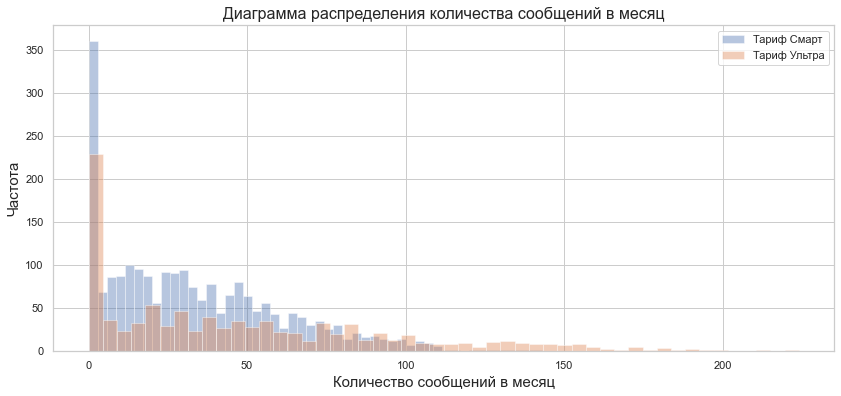

In [63]:
hist_def('Кол_во_сообщений', 'Диаграмма распределения количества сообщений в месяц', 50, 'Количество сообщений в месяц')

Наборы данных имеют схожее распределенние: наборы данных скошены вправо

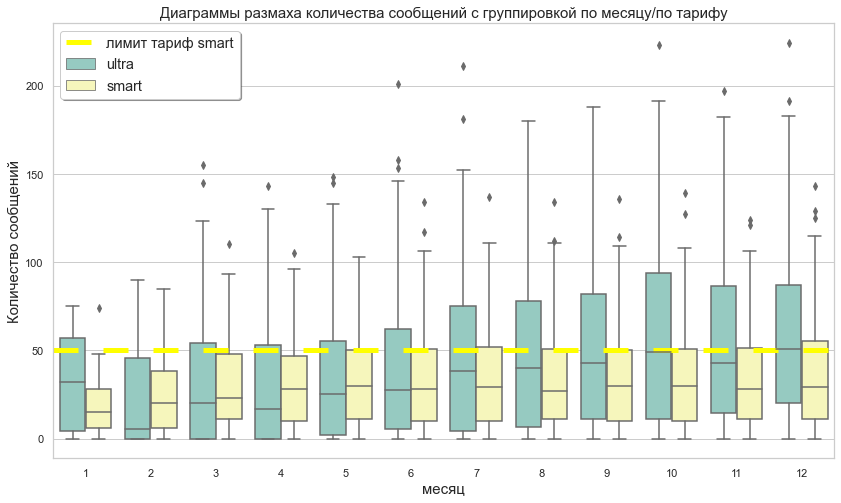

In [64]:
plt.figure(figsize=(14,8))
sns.boxplot(data=revenue_stat, x='month', y='Кол_во_сообщений', hue='tariff', palette="Set3")
plt.title('Диаграммы размаха количества сообщений с группировкой по месяцу/по тарифу', fontsize=15)
plt.xlabel('месяц', fontsize=15)
plt.ylabel('Количество сообщений', fontsize=15)
plt.axhline(y=50, color='yellow', linestyle=(0, (5, 5)), linewidth = 5, label='лимит тариф smart')
plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.show()

На Смарте пользователи в среднем тратят сообщений меньше того, что включено в тарифный план: 28 сообщений против 50. Редкие пользователи превышают бесплатный лимит в 50 сообщений своего тарифного плана Смарт. На Ультре пользователи в среднем тратят сообщений больше чем на Смарте, но это значение в разы меньше бесплатного лимита тарифного плана: 38 сообщений против 1000.

Заметна тенденция в распределении по месяцам: в обоих тарифах с февраля по декабрь количество сообщений растет. В январе на тарифе Ультра количество сообщений больше чем в нескольких следующих месяцах. Наверно, это связано с новогодними праздниками: в абонентсвую плату входят 1000 сообщений в месяц и пользователи не стесняются тратить их на поздравления.

### Длительность звонков

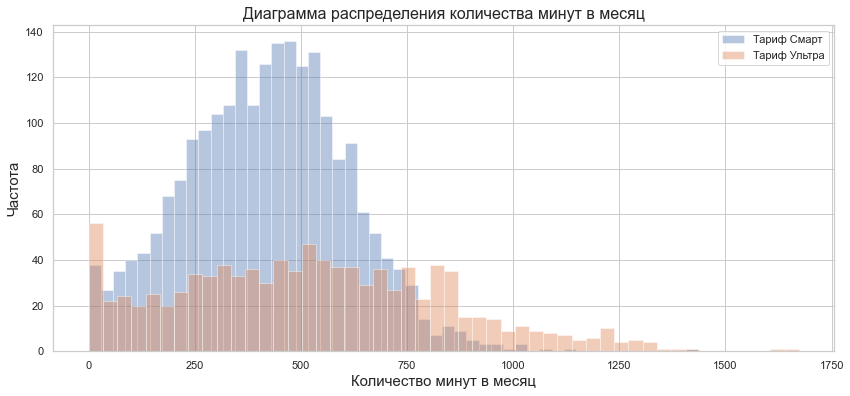

In [65]:
hist_def('Кол_во_минут', 'Диаграмма распределения количества минут в месяц', 50, 'Количество минут в месяц')

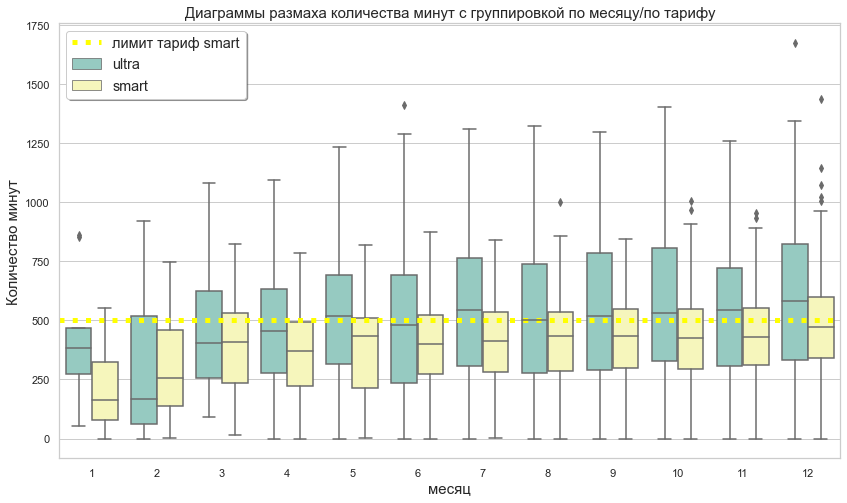

In [66]:
plt.figure(figsize=(14,8))
sns.boxplot(data=revenue_stat, x='month', y='Кол_во_минут', hue='tariff', palette="Set3")
plt.title('Диаграммы размаха количества минут с группировкой по месяцу/по тарифу', fontsize=15)
plt.xlabel('месяц', fontsize=15)
plt.ylabel('Количество минут', fontsize=15)
plt.axhline(y=500, color='yellow', linestyle=":", linewidth = 5, label='лимит тариф smart')
plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.show()

На Смарте пользователи в месяц говорят в среднем чуть больше 400 минут, на Ультре чуть больше 500 минут в месяц. На Смарте пользователи подходят к краю своего тарифа (500 сообщений), а на Ультре у них остается запас в 2500 минут.

Распределение по месяцам аналогично распределению количества сообщений

### Интернет траффик

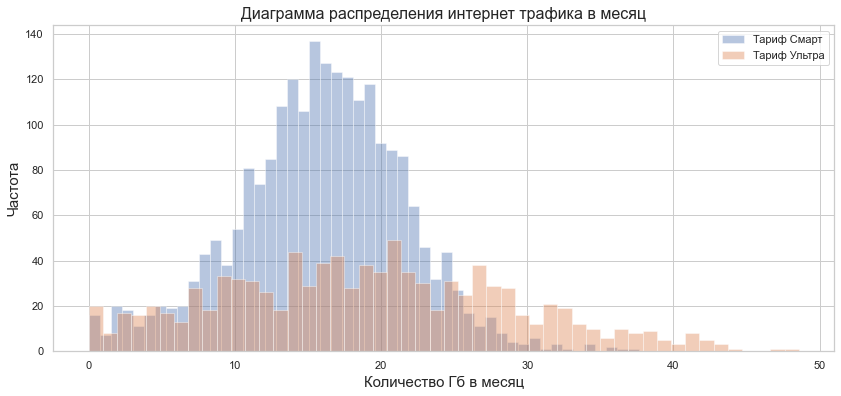

In [67]:
hist_def('Интернет_Гб', 'Диаграмма распределения интернет трафика в месяц', 50, 'Количество Гб в месяц')

Распределение интернет трафика в месяц на обоих тарифах похоже на нормальное

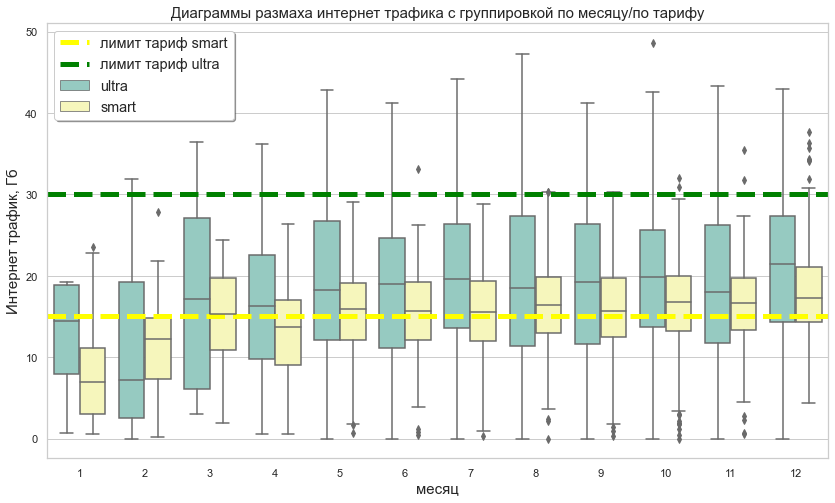

In [68]:
plt.figure(figsize=(14,8))
sns.boxplot(data=revenue_stat, x='month', y='Интернет_Гб', hue='tariff', palette="Set3")
plt.title('Диаграммы размаха интернет трафика с группировкой по месяцу/по тарифу', fontsize=15)
plt.xlabel('месяц', fontsize=15)
plt.ylabel('Интернет трафик, Гб', fontsize=15)
plt.axhline(y=15, color='yellow', linestyle="--", linewidth = 5, label='лимит тариф smart')
plt.axhline(y=30, color='green', linestyle="--", linewidth = 5, label='лимит тариф ultra')
plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.show()

На Смарте пользователи выходят за пределы тарифа: в среднем на 1 Гб, у Ультры снова запас — в 10 Гб.

Распределение по месяцам аналогично распределению количества сообщений

### Выручка

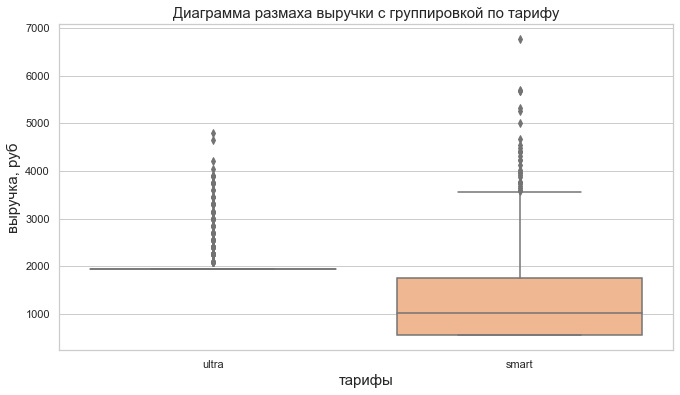

In [69]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(11,6))
sns.boxplot(data=revenue_stat, x='tariff', y='total_revenue_rub')
plt.title('Диаграмма размаха выручки с группировкой по тарифу', fontsize=15)
plt.xlabel('тарифы', fontsize=15)
plt.ylabel('выручка, руб', fontsize=15)
plt.show()

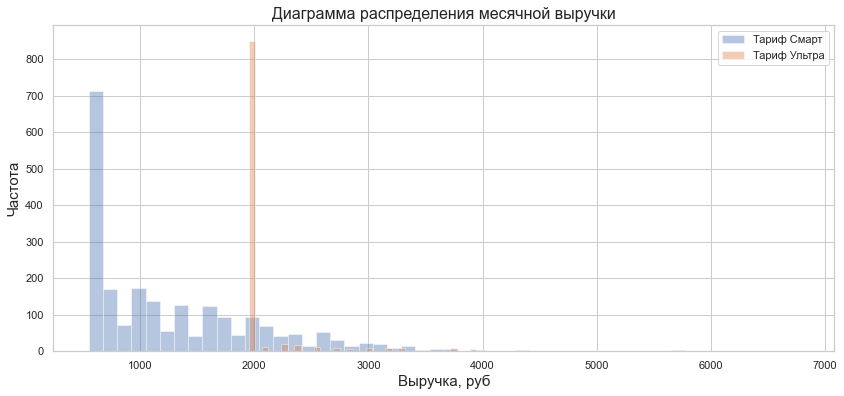

In [70]:
hist_def('total_revenue_rub', 'Диаграмма распределения месячной выручки', 50, 'Выручка, руб')

In [71]:
print('Число клиентов тарифа smart: ', revenue_stat.query('tariff=="smart"')['user_id'].nunique())
print('Число клиентов тарифа smart, которые хотя бы раз платили больше абонентской платы:',\
      revenue_stat.query('tariff=="smart" and total_revenue_rub!=550')['user_id'].nunique())
print('Процент клиентов тарифа smart, которые ни раз не платили больше абонентской платы в месяц: {:.2%}'.format\
      (1 - (revenue_stat.query('tariff=="smart" and total_revenue_rub!=550')['user_id'].nunique() / 
      revenue_stat.query('tariff=="smart"')['user_id'].nunique())))

Число клиентов тарифа smart:  350
Число клиентов тарифа smart, которые хотя бы раз платили больше абонентской платы: 333
Процент клиентов тарифа smart, которые ни раз не платили больше абонентской платы в месяц: 4.86%


In [72]:
print('Число клиентов тарифа ultra: ', revenue_stat.query('tariff=="ultra"')['user_id'].nunique())
print('Число клиентов тарифа ultra, которые хотя бы раз платили больше абонентской платы:',\
    revenue_stat.query('tariff=="ultra" and total_revenue_rub!=1950')['user_id'].nunique())
print('Процент клиентов тарифа ultra, которые ни разу не платили больше абонентской платы в месяц: {:.2%}'.format\
      (1 - (revenue_stat.query('tariff=="ultra" and total_revenue_rub!=1950')['user_id'].nunique() / 
      revenue_stat.query('tariff=="ultra"')['user_id'].nunique())))

Число клиентов тарифа ultra:  148
Число клиентов тарифа ultra, которые хотя бы раз платили больше абонентской платы: 43
Процент клиентов тарифа ultra, которые ни разу не платили больше абонентской платы в месяц: 70.95%


Интересно, что в тарифе Ультра "коробка" сильно сжалась: медианное значение выручки 1950 руб, что соответствует абонентской плате, редко кто из пользователей платит больше своей абонентской платы. Медианное значение выручки на тарифе Смарт 1023 руб, что почти в 2 раза больше абонентской платы (550 руб)

### Вывод

Пользователей тарифа Смарт в два раза больше пользователей тарифа Ультра: 350 против 148. 

Пользователи тарифа Ультра в среднем больше тратят минут, смс и мегабайт услуг в месяц.

Только 43 пользователя тарифа Ультра из 148 хотя бы раз платили больше абонентской платы: то есть почти 71% пользователей ни разу за год не платили больше абонентской платы в месяц

Только 17 пользователей тарифа Смарт из 350 ни разу за год не платили больше абонентской платы в месяц: это всего лишь 4.86%

## Проверка гипотез

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой

### Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы (нулевая гипотеза Н0 формулируется со знаком равенства. Исходя из нулевой гипотезы, формируется альтернативная гипотеза Н1, которая противоречит нулевой):
- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [73]:
ultra = revenue_stat.query('tariff == "ultra"')['total_revenue_rub']
smart = revenue_stat.query('tariff == "smart"')['total_revenue_rub']

print('Дисперсия выборки выручки пользователей тарифа Ультра:', np.var(ultra))
print('Дисперсия выборки выручки пользователей тарифа Смарт:', np.var(smart))

Дисперсия выборки выручки пользователей тарифа Ультра: 141373.07325620347
Дисперсия выборки выручки пользователей тарифа Смарт: 669485.2209234245


Дисперсии выборок не равны, поэтому будем использовать параметр `equal_var` = `False`

In [74]:
#примем критический уровень статистической значимости alpha равный 0.05
alpha = .05

results = st.ttest_ind(ultra, smart, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


4.26 на 10 в -250 степени, какой бы уровень значимости мы бы не выдвигали, p-value в любом случае туда поместится, так что отвергнем нулевую гипотезу. Выручка от тарифов различается.

In [75]:
revenue_stat.pivot_table(index='tariff', values='total_revenue_rub', aggfunc='mean')

,total_revenue_rub
tariff,
smart,1289.97
ultra,2070.15


Средние значения выручки по тарифам различаются почти в 2 раза. Если у пользователя подключен тариф "Смарт" с абонентской платой в 550 рублей, то он скорее всего по итогам месяца заплатит гораздо больше из-за нехватки услуг в рамках тарифного пакета.

**Вывод:**

Отвергаем первую гипотезу. 
Можно заключить с полной уверенностью, что доходы "Мегалайна" с пользователя по тарифу "Ультра" действительно отличаются по сравнению с доходами от тарифа "Смарт".

### Гипотеза о равенстве средних двух генеральных совокупностей №2

Сформулируем гипотезы:
- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [76]:
moscow = revenue_stat.query('city == "Москва"')['total_revenue_rub']
regions = revenue_stat.query('city != "Москва"')['total_revenue_rub']

print('Дисперсия выборки выручки пользователей города Москва:', np.var(moscow))
print('Дисперсия выборки выручки пользователей других городов:', np.var(regions))

Дисперсия выборки выручки пользователей города Москва: 564710.7117467273
Дисперсия выборки выручки пользователей других городов: 653886.3270894174


Дисперсии выборок стремятся к равенству, поэтому будем использовать параметр `equal_var` = `True`

In [77]:
#примем критический уровень статистической значимости alpha равный 0.05
alpha = .05

results = st.ttest_ind(moscow, regions, equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Значение p-value превышает уровень значимости, примем нулевую гипотезу: "Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"

In [78]:
#напишем функцию для категоризации населенных пунктов на категории столица - Москва и регионы 
def region(city):
    if city == 'Москва': 
        return 'Столица'
    else: 
        return 'Регион'

In [79]:
revenue_stat['region'] = revenue_stat['city'].apply(region)
revenue_stat.pivot_table(index='region', values='total_revenue_rub', aggfunc='mean')

,total_revenue_rub
region,
Регион,1524.94
Столица,1546.71


**Вывод:**

Данный статистический тест не дал возможности опровергнуть вторую гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны. Действительно, доходы в Московском регионе практически не отличаются от других населенных пунктов.

## Общий вывод

По результатам данного анализа можно сделать вывод, что тариф Ультра приносит больше денег компании из расчета на одного пользователя.

Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима.

Особенности использования тарифов заключаются в следующем:

- Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи в среднем доплачивают дополнительно за услуги сверх тарифа. Это в целом является выгодным для оператора, но может разочаровать пользователей и привести к оттоку. Пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.

Можно предположить, что пользователи в погоне за выгодой подключаются на более бюджетный тариф, но в последствии из-за нехватки предоставленных услуг, входящих в пакет, часть пользователей будет переходить на более дорогой пакет или же есть риск, что пользователи уйдут к другому оператору.
- СМС никому не нужны на обоих тарифах. Но если в Смарте пользователи близки к своим лимитам, то на Ультре остаются большие неизрасходованные "запасы". Если бы компании нужно было бы формировать новый тариф, стоило бы уменьшить в нем пакет смс